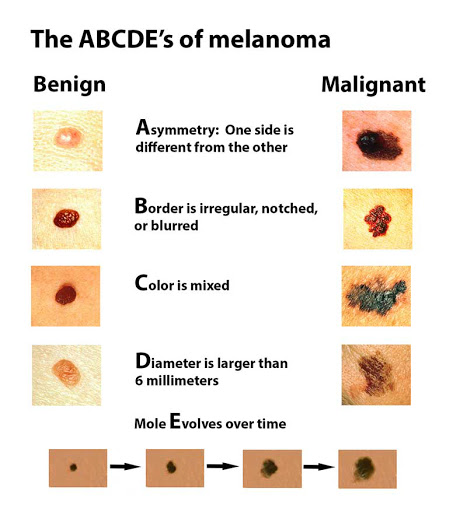

- **Melanoma is the deadliest form of skin cancer**. It occurs when pigment-making cells in the skin, called melanocytes, begin to reproduce uncontrollably. Melanoma can form from an existing mole or develop on unblemished skin.

- The most common type of melanoma spreads on the skin's surface. It is called superficial spreading melanoma. It may stay on the surface or grow down into deeper tissues. Other types of melanoma can start anywhere on or inside the body, including under fingernails or toenails and inside the eye.

- Melanoma rarely occurs before age 18. However, the risk of melanoma rises rapidly in young adulthood, making it one of the most common **life-threatening forms of cancer in people between the ages of 20 and 50.** After age 50, the risk of melanoma rises more slowly with advancing age.

- Source: [Melanoma - Harvard  Health](https://www.health.harvard.edu/cancer/melanoma-overview)

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns


In [ ]:
train = pd.read_csv('../input/siim-isic-melanoma-classification/train.csv')
test = pd.read_csv('../input/siim-isic-melanoma-classification/test.csv')
sample_sub = pd.read_csv('../input/siim-isic-melanoma-classification/sample_submission.csv')

In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
sample_sub.head()

In [ ]:
print('Train has {:,} rows and Test has {:,} rows.'.format(len(train), len(test)))

### Renaming the columns:

In [ ]:
cols = ['image', 'ID', 'sex', 'age', 'anatomy_site', 'diagnosis', 'benign_malignant', 'target']
train.columns = cols
test.columns = cols[:5]

In [ ]:
print(train.columns)
print(test.columns)

## Missing Values

In [ ]:
print(train.isnull().sum())
print(test.isnull().sum())

In [ ]:
# msno.bar(train)

plt.style.use('seaborn-colorblind')
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

msno.bar(train, ax = ax1, color=(193/255, 53/255, 192/255), fontsize=10)
msno.bar(test, ax = ax2, color=(251/255, 0/255, 0/255), fontsize=10)

ax1.set_title('Train Missing Values Map', fontsize = 16)
ax2.set_title('Test Missing Values Map', fontsize = 16);

### Missing Values in Training Data.

- **sex : 65**
- **age : 68**
- **anatomy_site : 527**


In [ ]:
print(plt.style.available)

In [ ]:
plt.style.use('seaborn-colorblind')
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

msno.matrix(train, ax = ax1, color=(0/255, 248/255, 0/255), fontsize=10 ,sparkline=False)
msno.matrix(test, ax = ax2, color=(0/255, 0/255, 220/255), fontsize=10 ,sparkline=False)

ax1.set_title('Missing Values in Training Data', fontsize = 16)
ax2.set_title('Missing Value in Testing Data', fontsize = 16);

### Missing Values in Test Data:

- **anatom_site : 351**


In [ ]:
# msno.dendrogram(train)
# plt.style.use('seaborn-notebook')
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 5))

msno.dendrogram(train, ax = ax1, fontsize=12)
msno.dendrogram(test, ax = ax2, fontsize=12)

# ax1.set_title('Train Missing Values Map', fontsize = 16)
# ax2.set_title('Test Missing Values Map', fontsize = 16);


## Missing Values Imputation in Training Data:

- **sex : 65/33126**
- **age : 68/33126**
- **anatomy_site : 527/33126**

In [ ]:
train.nunique()

In [ ]:
# train['anatomy_site'].value_counts().sort_index().plot.bar()

print(train['anatomy_site'].value_counts())
print(train['age'].value_counts())
print(train['sex'].value_counts())

In [ ]:
# train['age'].value_counts().sort_index().plot.bar()
plt.style.use('dark_background')
plt.figure(figsize=(10,8))  
# sns.set(style="darkgrid")
ax = sns.countplot(x = train['age'])

### Age:

- 45.0 :   4466

- 50.0 :  4270

- 55.0  : 3824

- 40.0 : 3576

- 60.0 :   3240

- 35.0 :   2850

- 65.0 :   2527

- 30.0 :   2358

- 70.0 :   1968

- 25.0 :   1544

- 75.0  :   981

- 20.0  :   655

- 80.0  :   419

- 85.0  :   149

- 15.0  :   132

- 90.0      80

- 10.0  :    17

- 0.0   :     2

In [ ]:
## Can use this as well to plot. 
# train['sex'].value_counts().sort_index().plot.bar()


## Alternate and better plot:

# plt.figure(figsize=(10,8))  
sns.set(style="darkgrid")
plt.style.use('seaborn-notebook')
ax = sns.countplot(x = train['sex'])

### Sex:

- **male --> 17080**

- **female --> 15981**

In [ ]:
print(plt.style.available)

In [ ]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
plt.style.use('seaborn-notebook')
ax = sns.countplot(y = train['anatomy_site'],facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

### Anatomy_site:

- torso --> 16845

- lower extremity --> 8417

- upper extremity --> 4983

- head/neck --> 1855

- palms/soles --> 375

- oral/genital  --> 124

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

sns.set(style="darkgrid")
a = sns.countplot(x = train['anatomy_site'], ax = ax1)
b = sns.countplot(x = test['anatomy_site'], ax = ax2)

a.set_xticklabels(a.get_xticklabels(), rotation=45, ha="right")
b.set_xticklabels(b.get_xticklabels(), rotation=45, ha="right")

ax1.set_title('Anatomy Site Distribution in Training Data', fontsize = 16)
ax2.set_title('Anatomy Site Distribution in Testing Data', fontsize = 16);

**In both Test and training data, 'torso' is the mode in anatomy_site column**

In [ ]:
plt.figure(figsize = (10,8))
plt.style.use('fivethirtyeight')
ax = sns.countplot(x= "anatomy_site", hue="sex", data=train)

In [ ]:
plt.style.use('dark_background')
plt.figure(figsize = (10,8))
ax = sns.countplot(x= "sex", hue= "age", data=train)

In [ ]:
plt.figure(figsize = (10,8))
ax = sns.countplot(x = "target", hue = "sex", data = train)

**Haven't found any strong correlation between columns**
- Let's impute the null values with:

- **Age --> Median**
- **Sex --> Mode**
- **Anatomy_site --> Mode**

In [ ]:
train['age'].median()

In [ ]:
train['age'].fillna(50,inplace = True) 
train['sex'].fillna('male', inplace = True) 
train['anatomy_site'].fillna('torso', inplace = True) 
test['anatomy_site'].fillna('torso', inplace = True)

print(train.isnull().sum())
print(test.isnull().sum())

## EDA: Let's do some Analysis.

**1. Target Variable** 

In [ ]:
print(train['target'].value_counts())

plt.style.use('dark_background')
plt.figure(figsize=(10,8))  
# sns.set(style="darkgrid")
sns.countplot(x = train['target'])

**32542 --> 0**

and only
**584 --> 1s**


In [ ]:
# x = dict(train['diagnosis'].value_counts())
# print(x)
# print(x.keys())


plt.figure(figsize=(10,8))  
sns.set(style="darkgrid")
a = sns.countplot(x = train['diagnosis'])
a.set_xticklabels(a.get_xticklabels(), rotation=45, ha="right")
# b.set_xticklabels(b.get_xticklabels(), rotation=35, ha="right")


## Handling Class Imbalance:

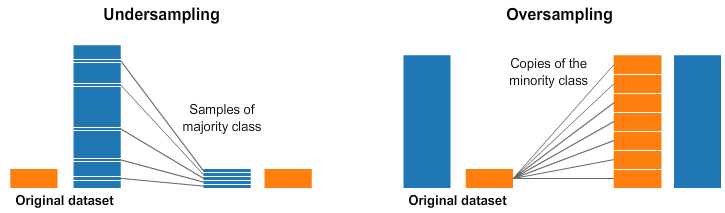

**Oversampling** and **undersampling** in data analysis are techniques used to adjust the class distribution of a data set (i.e. the ratio between the different classes/categories represented). These terms are used both in statistical sampling, survey design methodology and in machine learning.

Oversampling and undersampling are opposite and roughly equivalent techniques.

**In simple Terms**

- Undersampling does undersamples the training data so that both the classes have equal distribution.

- Oversampling is oversamples the training data so that both the classes have equal distribution.

### 1. [Undersampling:](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.NearMiss.html)

In [ ]:
y = train['target']
plt.style.use('dark_background')
# plt.style.use('seaborn-paper')
a = y.value_counts().plot.bar()
a.set_xticklabels(a.get_xticklabels(), rotation=0, ha="right")

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop the unwanted columns
train = train.drop(['image','ID','diagnosis','benign_malignant'],axis=1)

# Label Encode categorical features
train['age'].fillna(50,inplace = True) 
train['sex'].fillna('male', inplace = True) 
train['anatomy_site'].fillna('torso', inplace = True) 

le_sex = LabelEncoder()
le_site = LabelEncoder()
train.sex = le_sex.fit_transform(train.sex)

## Getting dummies for anatomy_site
x = pd.get_dummies(train['anatomy_site'], drop_first = True)

## Concat dummies and actual data.
train_x = pd.concat([train,x], axis = 1)


In [ ]:
train_x.head()

In [ ]:
from imblearn.under_sampling import NearMiss

X = train_x.drop(['target','anatomy_site'], axis = 1)
n = NearMiss()
X_new,y_new = n.fit_sample(X,y)

In [ ]:
plt.style.use('dark_background')
# plt.style.use('seaborn-paper')
a = y_new.value_counts().plot.bar()
a.set_xticklabels(a.get_xticklabels(), rotation=0, ha="right")

**Both Ones and Zeroes are 584**. This is known as balanced dataset, but the issue here is we have reduced the dataset drastically. 

### 2. [Oversampling:](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTETomek.html)

In [ ]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_new_over,y_new_over = smk.fit_sample(X,y)

In [ ]:
plt.style.use('dark_background')
# plt.style.use('seaborn-paper')
a = y_new_over.value_counts().plot.bar()
a.set_xticklabels(a.get_xticklabels(), rotation=0, ha="right")

**Now the sample size is north of 30K.**

## Next Steps:

- Feature Extraction

- Modelling

- Predictions



## References

1. [SIIM Melanoma Competition: EDA + Augmentations](https://www.kaggle.com/andradaolteanu/siim-melanoma-competition-eda-augmentations)

2. [Missingno Github Repository](https://github.com/ResidentMario/missingno)

3. [Seaborn Countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

4. [Cover Image Source](https://www.health.harvard.edu/cancer/melanoma-overview)

5. [Matplotlib Visualizations](https://matplotlib.org/3.2.2/tutorials/introductory/customizing.html)

6. [imblearn.under_sampling.NearMiss](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.NearMiss.html)

7. [imblearn.combine.SMOTETomek](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.combine.SMOTETomek.html)



**Feel free to fork and if you find this kernel helpful do cast an upvote.**